# Visualization with Seaborn Library
* In this notebook you will find most useful plots in seaborn library.
* These plots give very important insight before starting a data analysis, they help you set your analysis direction.
* The datasets I used needed to be manuplated a little bit sometimes. Since the focus of this notebook is to __emphasize plotting styles__, I wrapped up my coding into one cell to prevent distractions.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

### Let's start by reading csv files to work on

In [4]:
ppbpl = pd.read_csv('PercentagePeopleBelowPovertyLevel.csv', encoding="windows-1252")
highschool25 = pd.read_csv('PercentOver25CompletedHighSchool.csv', encoding="windows-1252")
race = pd.read_csv('ShareRaceByCity.csv', encoding="windows-1252")
kill = pd.read_csv('PoliceKillingsUS.csv', encoding="windows-1252")

## Barplot 1

In [11]:
ppbpl.head()
#ppbpl.info()

,Geographic Area,City,poverty_rate
0,AL,Abanda CDP,78.8
1,AL,Abbeville city,29.1
2,AL,Adamsville city,25.5
3,AL,Addison town,30.7
4,AL,Akron town,42


In [18]:
#ppbpl.poverty_rate.value_counts()  

There are '-' symbols in data, I will replace them with zeros.

Text(0.5, 1.0, 'Poverty Rate Given States')

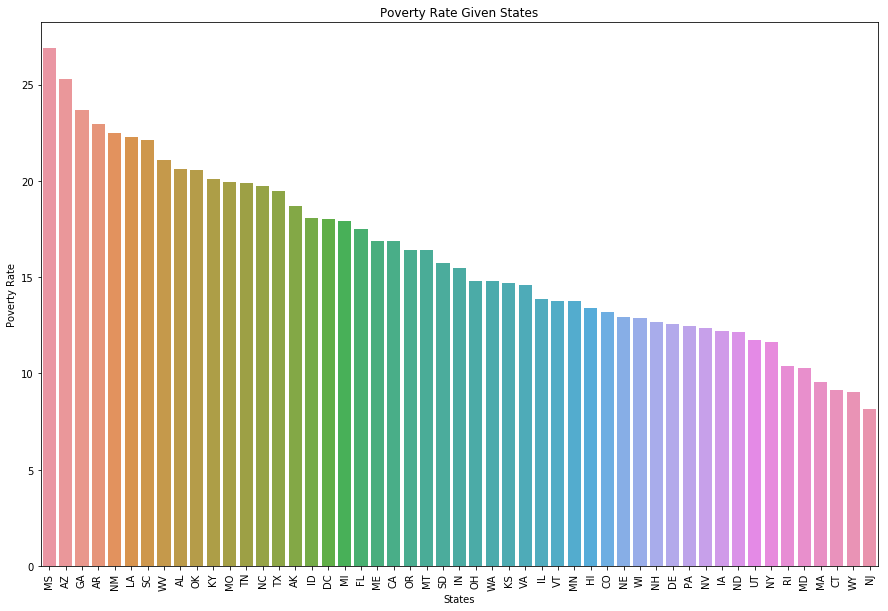

In [16]:
#Poverty Rate of each state
ppbpl.poverty_rate.replace(['-'],0,inplace=True)
ppbpl.poverty_rate=ppbpl.poverty_rate.astype(float)

area_list = list(ppbpl['Geographic Area'].unique())
#area_list
area_pov_ratio=[]

for i in area_list:
    x = ppbpl[ppbpl['Geographic Area']==i]
    area_pov_rate = sum(x.poverty_rate)/len(x)
    area_pov_ratio.append(area_pov_rate)
  

 ### Sorting ###   
newdata = pd.DataFrame({'area_list':area_list,'Poverty_Ratio':area_pov_ratio})
# newdata.head()

new_index = (newdata['Poverty_Ratio'].sort_values(ascending=False)).index.values
# new_index

sorted_data_povrate = newdata.reindex(new_index)
# sorted_data_povrate

### Visualization ###
plt.figure(figsize=(15,10))
sns.barplot(x=sorted_data_povrate['area_list'], y=sorted_data_povrate['Poverty_Ratio'])
plt.xticks(rotation= 90)
plt.xlabel('States')
plt.ylabel('Poverty Rate')
plt.title('Poverty Rate Given States')

## Barplot 2

In [67]:
kill.head()
#kill.name.value_counts() 
# Values like 'TK TK' and 'TK Tk' are available in data 

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


### Most common 15 Name or Surname of killed people

In [33]:
separated = kill.name[kill.name != 'TK TK'].str.split() 
#separated
a,b = zip(*separated)                    
name_list = a+b                         
name_count = Counter(name_list)         
most_common_names = name_count.most_common(15)  
x,y = zip(*most_common_names)
x,y = list(x),list(y)

Text(0.5, 1.0, 'Most common 15 Name or Surname of killed people')

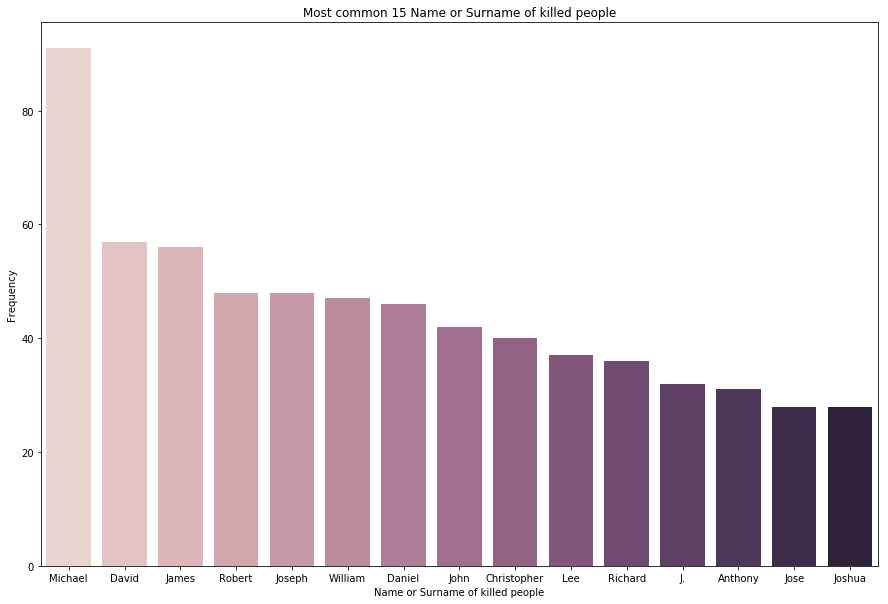

In [34]:
# VISUALIZATION
plt.figure(figsize=(15,10))
sns.barplot(x=x, y=y,palette = sns.cubehelix_palette(len(x)))
plt.xlabel('Name or Surname of killed people')
plt.ylabel('Frequency')
plt.title('Most common 15 Name or Surname of killed people')

## Barplot 3

In [68]:
highschool25.head()
#highschool25.info()
#highschool25.dtypes

,Geographic Area,City,percent_completed_hs
0,AL,Abanda CDP,21.2
1,AL,Abbeville city,69.1
2,AL,Adamsville city,78.9
3,AL,Addison town,81.4
4,AL,Akron town,68.6


### High school graduation rate of the population that is older than 25 in states

In [38]:
#highschool25.percent_completed_hs.value_counts()
highschool25.percent_completed_hs.replace(['-'],0.0,inplace=True)
highschool25.percent_completed_hs=highschool25.percent_completed_hs.astype(float)

arealist2=list(highschool25['Geographic Area'].unique())
highschool_area=[]

for i in arealist2:
    xx=highschool25[highschool25['Geographic Area']==i]
    area_hs_rate=sum(xx.percent_completed_hs)/len(xx)
    highschool_area.append(area_hs_rate)
 
 # SORTING    
df2=pd.DataFrame({'AreaList': arealist2,'HS_Ratio':highschool_area})
#new_index=(df2['HS_Ratio'].sort_values(ascending=True)).index.values
#sorted2HS=df2.reindex(neue_index)

sorted2HS=df2.sort_values('HS_Ratio',ascending=True) 
## This way you can directly sort without dealing with indexes as in commented above lines

### Visualization

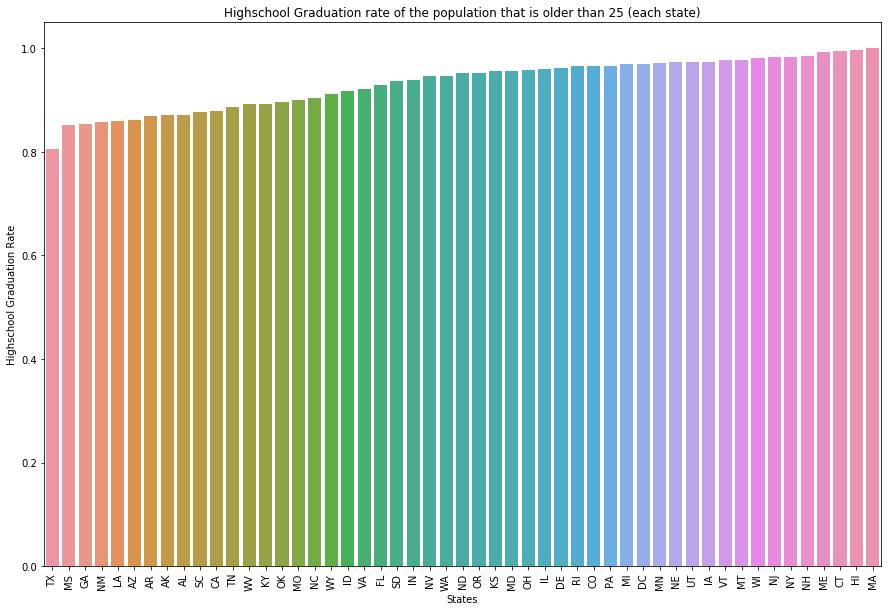

In [70]:
plt.figure(figsize=(15,10))
sns.barplot(x=sorted2HS['AreaList'],y=sorted2HS['HS_Ratio'])
plt.xticks(rotation=90)
plt.xlabel('States')
plt.ylabel('Highschool Graduation Rate')
plt.title('Highschool Graduation rate of the population that is older than 25 (each state)')
plt.show()

## Barplot 4

In [42]:
race.head()
#race.info() # object types must be converted to integers
#race.isnull().sum() 

,Geographic area,City,share_white,share_black,share_native_american,share_asian,share_hispanic
0,AL,Abanda CDP,67.2,30.2,0,0,1.6
1,AL,Abbeville city,54.4,41.4,0.1,1,3.1
2,AL,Adamsville city,52.3,44.9,0.5,0.3,2.3
3,AL,Addison town,99.1,0.1,0,0.1,0.4
4,AL,Akron town,13.2,86.5,0,0,0.3


### Races ratio by each State

In [71]:
# values like (X) occur 
race.replace(['(X)'],0.0,inplace=True)
race.replace(['-'],0.0,inplace=True)

race.loc[:,['share_white',
            'share_black',
            'share_native_american',
            'share_asian','share_hispanic']] = race.loc[:,['share_white',
                                                           'share_black',
                                                           'share_native_american',
                                                           'share_asian',
                                                           'share_hispanic']].astype(float)


arealist3=list(race['Geographic area'].unique())

white=[]
black=[]
native=[]
asian=[]
hispanic=[]

for i in arealist3:
    x=race[race['Geographic area']==i]
    white.append(sum(x.share_white)/len(x))
    black.append(sum(x.share_black)/len(x))
    native.append(sum(x.share_native_american)/len(x))
    asian.append(sum(x.share_asian)/len(x))
    hispanic.append(sum(x.share_hispanic)/len(x))

### Visualization

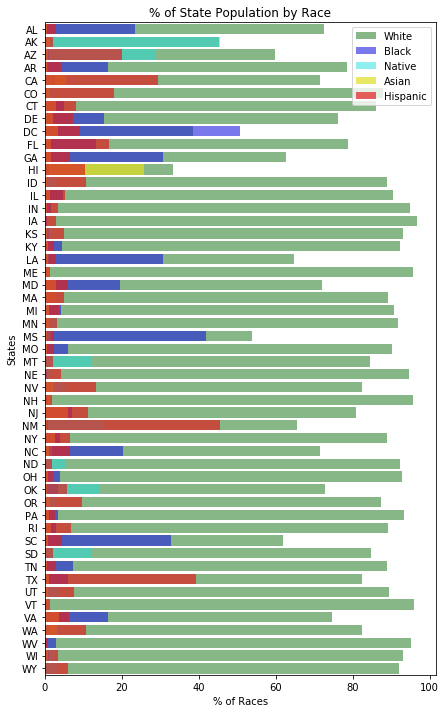

In [72]:
f, ax=plt.subplots(figsize=(7,12))
sns.barplot(x=white,y=arealist3,color='green',alpha=0.5,label='White')
sns.barplot(x=black,y=arealist3,color='blue',alpha=0.6,label='Black')
sns.barplot(x=native,y=arealist3,color='cyan',alpha=0.5,label='Native')
sns.barplot(x=asian,y=arealist3,color='yellow',alpha=0.7,label='Asian')
sns.barplot(x=hispanic,y=arealist3,color='red',alpha=0.7,label='Hispanic')

ax.legend(loc='upper right',frameon=True) #frameon: show legend
ax.set(xlabel='% of Races',ylabel='States',title='% of State Population by Race')
plt.show()

## Jointplot

In [ ]:
sorted_data_povrate['Poverty_Ratio']=sorted_data_povrate['Poverty_Ratio']/max(sorted_data_povrate['Poverty_Ratio'])
sorted2HS['HS_Ratio']=sorted2HS['HS_Ratio']/max(sorted2HS['HS_Ratio'])

# Concatenation of two dataframes
conc_data=pd.concat([sorted_data_povrate,sorted2HS['HS_Ratio']],axis=1)
conc_data.sort_values('Poverty_Ratio',inplace=True) 

### Visualization of Highschool Graduation rate vs Poverty rate

C:\Users\yigit\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\yigit\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


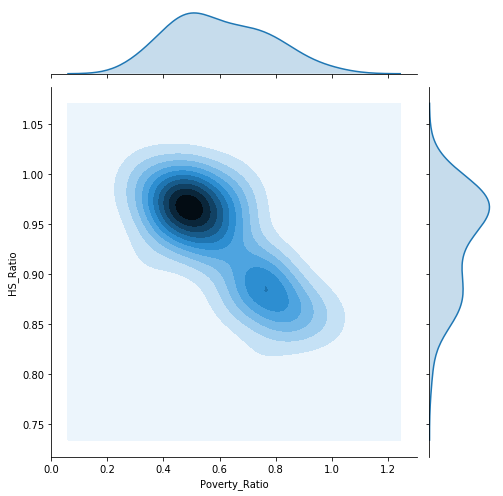

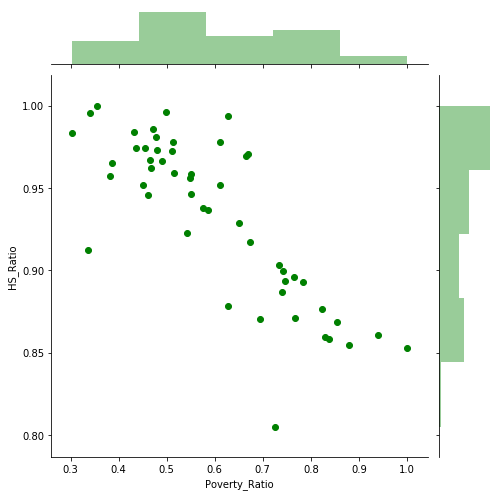

In [74]:
# rate of each state with different style of code
# Show the joint distribution using kernel density estimation
jointplot1=sns.jointplot(conc_data.Poverty_Ratio, conc_data.HS_Ratio, kind='kde',size=7)
#plt.savefig('graph1.png')
#plt.show()
jointplot2=sns.jointplot('Poverty_Ratio', 'HS_Ratio',data=conc_data,size=7,ratio=6,color='g')

## Pie Chart
### Rates that races are killed

Text(0.5, 1.0, 'Killed People Races')

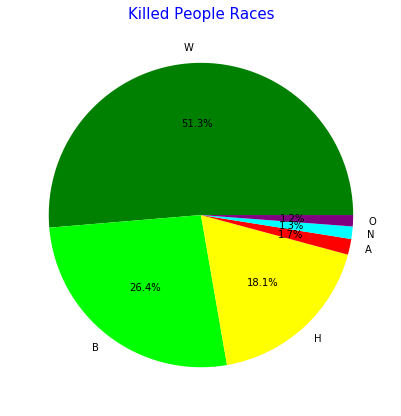

In [81]:
kill.columns
kill.race.value_counts()
kill.race.value_counts().index # elements of a column
kill.race.value_counts().values # counts as an array

kill.race.dropna(inplace=True)
labels1=kill.race.value_counts().index
colorz=['green','lime','yellow','red','cyan','purple']
expld=[0,0,0,0,0,0]
gillcounts=kill.race.value_counts().values

#Visualization
##### import matplotlib.pyplot as plt #### not seaborn library
plt.figure(figsize=(7,7))
plt.pie(gillcounts,explode=expld,labels=labels1, colors=colorz, autopct='%1.1f%%')
plt.title('Killed People Races',color='blue',fontsize=15)

## LM PLOT
### Visualization of Linear Relationship of Highschool Graduation rate vs Poverty rate

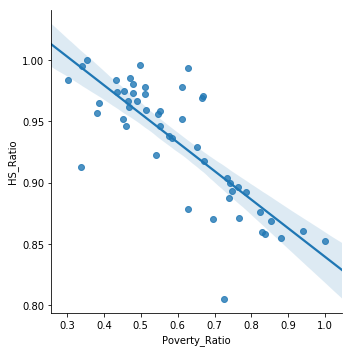

In [82]:
# Show the results of a linear regression within each dataset
sns.lmplot(x='Poverty_Ratio',y='HS_Ratio',data=conc_data)
plt.show()

## KDE Plot

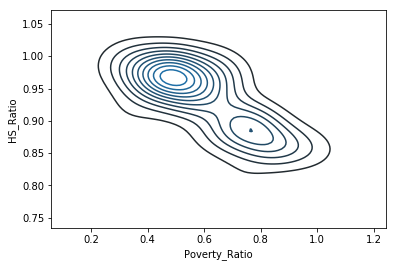

In [87]:
sns.kdeplot(conc_data.Poverty_Ratio, conc_data.HS_Ratio, shade=False, cut=3) #shade: whether filled or not.
plt.show() 

## VIOLIN PLOT
### Show each distribution with both violins and points

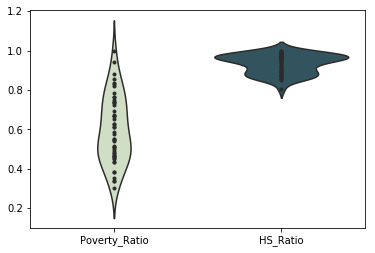

In [88]:
# Use cubehelix to get a custom sequential palette
gg=sns.cubehelix_palette(2,rot=-.5,dark=.3)
sns.violinplot(data=conc_data, palette=gg,inner='points')
plt.show()

## HEATMAP 
### Correlation Map

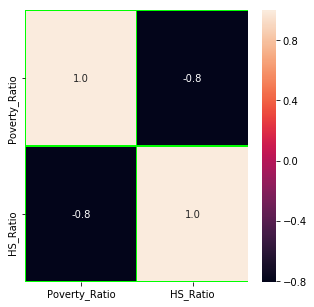

In [89]:
#conc_data.corr()

f,plot1 = plt.subplots(figsize=(5, 5))
sns.heatmap(conc_data.corr(), annot=True, linewidths=0.5,linecolor="lime", fmt= '.1f',ax=plot1)
plt.show()  #annot= whether correlation coefficients shown or not, fmt: digits after dot

## BOX PLOT

In [90]:
kill.columns
#kill.state.value_counts()

Index(['id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender',
       'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level',
       'flee', 'body_camera'],
      dtype='object')

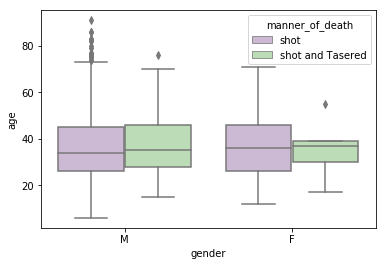

In [94]:
kill.gender.unique()
kill.manner_of_death.unique()


sns.boxplot(x='gender', y='age', hue='manner_of_death', data=kill, palette='PRGn')
plt.show()

## SWARM PLOT
* This one is a good guide for clustering algorithms
* Disadvantage: If too many data points, memory will be forced too much and maybe can't be drawn.

<function matplotlib.pyplot.show(*args, **kw)>

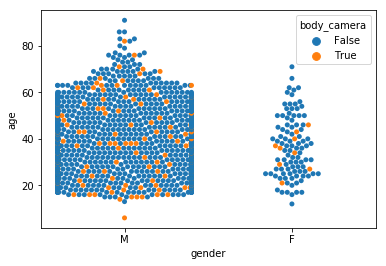

In [95]:
sns.swarmplot(x='gender', y='age', hue='body_camera', data=kill)
plt.show

## Pair Plot

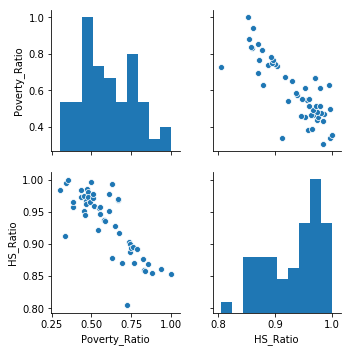

In [96]:
sns.pairplot(conc_data)
plt.show()

## Count Plot 1

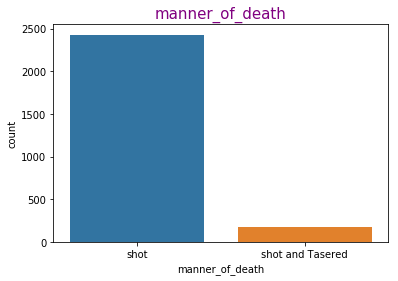

In [100]:
# kill properties
# Manner of death
sns.countplot(kill.gender)
sns.countplot(kill.manner_of_death)
plt.title("manner_of_death",color = 'purple',fontsize=15)
plt.show()

## Count Plot 2

Text(0.5, 1.0, 'Age of killed people')

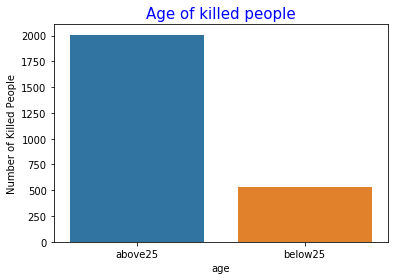

In [101]:
# age of killed people
above25 =['above25' if i >= 25 else 'below25' for i in kill.age]
df = pd.DataFrame({'age':above25})
sns.countplot(x=df.age)
#sns.countplot(x=above25)
plt.ylabel('Number of Killed People')
plt.title('Age of killed people',color = 'blue',fontsize=15)

* I hope you found this notebook useful, I will also upload plotly library soon.